Here, I will perform some quick graphical analysis to gain more insight into the data.

First, I load the relevant libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_data.csv',index_col=0)
animes_dummies = pd.read_csv('animes_dummies.csv',index_col=0)

In [3]:
animes_dummies.iloc[:,0:42]

,Rating,animeID,Fantasy,Super Power,Slice of Life,Mecha,Psychological,Game,Dementia,Martial Arts,...,Romance,Shoujo,Shoujo Ai,Vampire,Music,Ecchi,Supernatural,Adventure,Cars,Magic
0,9.25,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,9.24,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,9.16,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,9.15,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.13,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,7.40,1389,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1390,7.40,1390,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1391,7.39,1391,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1392,7.39,1392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I perform some steps in pandas to determine the number of anime of each genre appearing in the dataset. Note: anime usually belong to more than one genre.

In [4]:
animes_sums = animes_dummies.iloc[:,2:42].sum()

In [5]:
animes_sums.index

Index(['Fantasy', 'Super Power', 'Slice of Life', 'Mecha', 'Psychological',
       'Game', 'Dementia', 'Martial Arts', 'Sports', 'Action', 'Harem',
       'Police', 'Sci-Fi', 'Kids', 'Horror', 'School', 'Military', 'Seinen',
       'Thriller', 'Space', 'Demons', 'Comedy', 'Shounen', 'Parody', 'Mystery',
       'Samurai', 'Historical', 'Drama', 'Josei', 'Shounen Ai', 'Romance',
       'Shoujo', 'Shoujo Ai', 'Vampire', 'Music', 'Ecchi', 'Supernatural',
       'Adventure', 'Cars', 'Magic'],
      dtype='object')

In [6]:
animes_sums_dict = {animes_sums.index[i]:animes_sums.values[i] for i in range(len(animes_sums))}

In [7]:
animes_sums_dict

{'Fantasy': 327,
 'Super Power': 105,
 'Slice of Life': 246,
 'Mecha': 119,
 'Psychological': 84,
 'Game': 27,
 'Dementia': 9,
 'Martial Arts': 45,
 'Sports': 102,
 'Action': 534,
 'Harem': 42,
 'Police': 53,
 'Sci-Fi': 285,
 'Kids': 53,
 'Horror': 47,
 'School': 252,
 'Military': 103,
 'Seinen': 125,
 'Thriller': 39,
 'Space': 68,
 'Demons': 54,
 'Comedy': 636,
 'Shounen': 387,
 'Parody': 34,
 'Mystery': 174,
 'Samurai': 33,
 'Historical': 127,
 'Drama': 472,
 'Josei': 23,
 'Shounen Ai': 14,
 'Romance': 345,
 'Shoujo': 127,
 'Shoujo Ai': 10,
 'Vampire': 18,
 'Music': 52,
 'Ecchi': 49,
 'Supernatural': 266,
 'Adventure': 360,
 'Cars': 12,
 'Magic': 133}

In [8]:
animes_sums_df = pd.DataFrame(animes_sums,columns=['Count'])

In [9]:
animes_sums_df['Genre'] = animes_sums_df.index
animes_sums_df = animes_sums_df.reset_index().iloc[:,1:]

In [10]:
animes_sums_df

,Count,Genre
0,327,Fantasy
1,105,Super Power
2,246,Slice of Life
3,119,Mecha
4,84,Psychological
5,27,Game
6,9,Dementia
7,45,Martial Arts
8,102,Sports
9,534,Action


In [11]:
animes_sums_df = animes_sums_df.sort_values(by='Count',ascending=False)

Here, I use seaborn to visualize the distribution of animes across genres - comedy, action, and drama are particularly common.

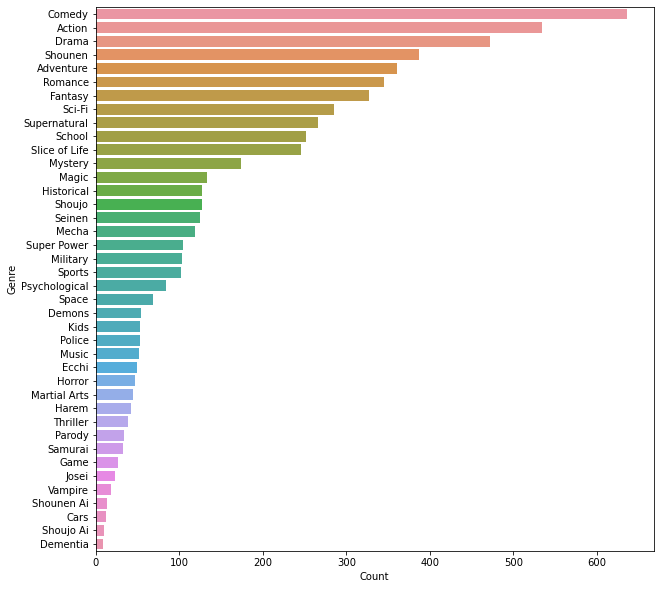

In [12]:
plt.figure(figsize=(10,10))
bplot = sns.barplot(x='Count',y='Genre',data=animes_sums_df)
bplot.tick_params(axis='y', labelsize=10)

In [13]:
print(train_data.head())

     userID  animeID  Score
63      408      683      6
93      905      319      6
112    1922     1197      8
13     1432      213     10
28      476       40      6


Here, I use a seaborn countplot to visualize the distribution of ratings in the test set. Clearly, the distribution is very skewed, with the majority of ratings being 'good' (7 or above). I believe that this will make particularly low ratings harder to predict as accurately as higher ones.

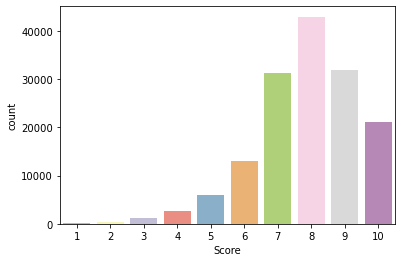

In [23]:
sns.countplot(train_data['Score'],palette="Set3")

In [24]:
train_pivot = train_data.pivot(index='animeID',columns='userID',values='Score')

Here, I visualize the number of anime watched by each user. It seems most common for people to watch few than 200, but there are quite a few exceptions who've watched a lot more.

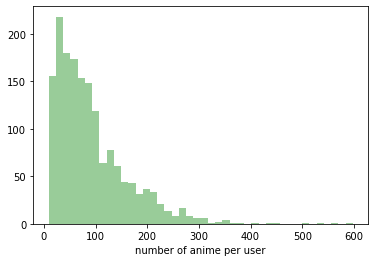

In [35]:
sns.distplot(train_data['userID'].value_counts(),axlabel='number of anime per user',color='green',kde=False)

Similarly, I plot the number of users who've rated each particular anime. The distribution here is comparable, with the majority below 200.

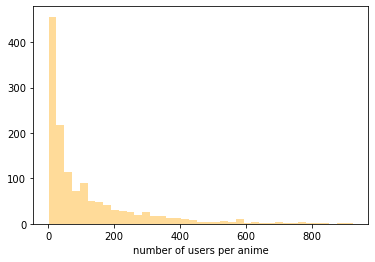

In [36]:
sns.distplot(train_data['animeID'].value_counts(),axlabel='number of users per anime',color='orange',kde=False)

In [26]:
user_means_stds = pd.read_csv('user_means_stds.csv',index_col=0)
print(user_means_stds.head())

   userID      mean       std
0   408.0  6.809524  1.468565
1   905.0  7.183824  1.420497
2  1922.0  8.290323  1.140170
3  1432.0  9.194444  1.043273
4   476.0  7.190476  0.800346


Here is a plot of mean user ratings for each user. This is closer to a normal distribution, as one would expect.

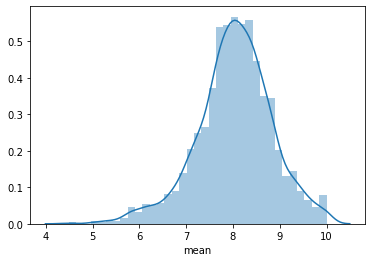

In [27]:
sns.distplot(user_means_stds['mean'])

Here is a plot of the standard deviations of each user's ratings. This indicates that the typical user's rating will tend to differ from the mean by about 1.25 points on average. We wish for the predictions of our models to noticeably outperform this.

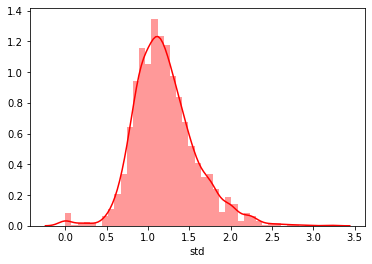

In [29]:
sns.distplot(user_means_stds['std'],color='red')

Now, it is time to use the data processed so far to construct models to predict the ratings of the users in the test set, the goal being to minimize RMSE.